In [ ]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation


pd.set_option('display.float_format', lambda x: '%.3f' % x) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [12]:
orders = pd.read_csv('/Users/mousumi/instracart/instacart-market-basket-analysis/orders.csv')

In [13]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000
3,2254736,1,prior,4,4,7,29.000
4,431534,1,prior,5,4,15,28.000
5,3367565,1,prior,6,2,7,19.000
6,550135,1,prior,7,1,9,20.000
7,3108588,1,prior,8,1,14,14.000
8,2295261,1,prior,9,1,16,0.000
9,2550362,1,prior,10,4,8,30.000


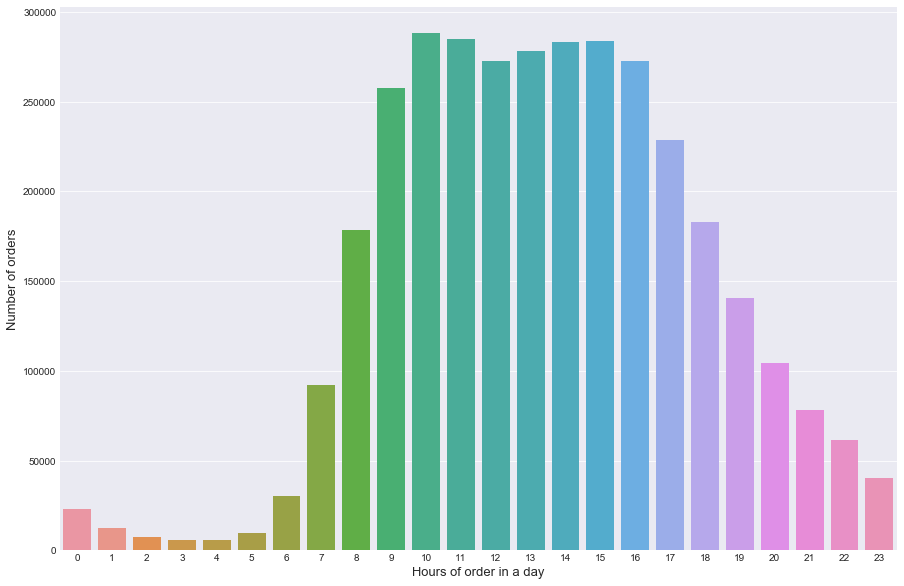

In [14]:
grouped = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

#People mostly order between 8 and 19 (anonimyzed hours and probably between 8 a.m and 7 p.m.)

In [16]:
order_product = pd.read_csv('/Users/mousumi/instracart/instacart-market-basket-analysis/order_products.csv')

In [ ]:
#missing
total = order_product.isnull().sum().sort_values(ascending=False)
percent = (order_product.isnull().sum()/order_products_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

In [21]:
# Check the number of unique orders and unique products
orders_Unique = len(set(order_product.order_id))
products_Unique = len(set(order_product.product_id))
print("There are %s orders for %s products" %(orders_Unique, products_Unique))

There are 3214874 orders for 49677 products


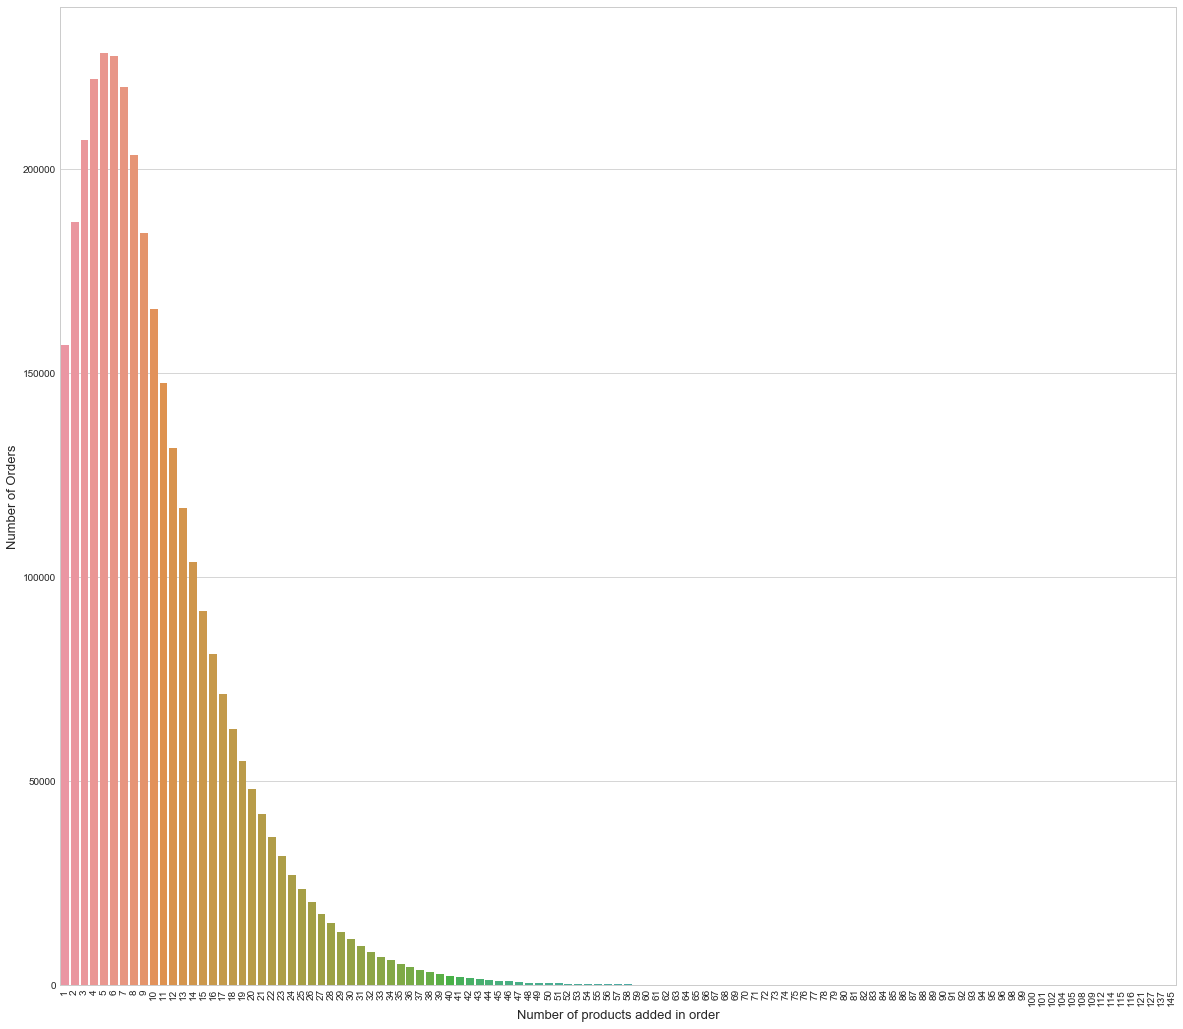

In [23]:
# number of products people usually order
grouped = order_product.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20, 18))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

# it is ~5-6 items per order

In [74]:
#Most reorderd items
product = pd.read_csv('/Users/mousumi/instracart/instacart-market-basket-analysis/products.csv')
grouped = order_product.groupby("product_id")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, product[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped
# fruits like banana and strawberries are the most reordered itmes

,product_id,Total_reorders,product_name
24848,24852,472565,Banana
13172,13176,379450,Bag of Organic Bananas
21133,21137,264683,Organic Strawberries
21899,21903,241921,Organic Baby Spinach
47198,47209,213584,Organic Hass Avocado
47755,47766,176815,Organic Avocado
47615,47626,152657,Large Lemon
16793,16797,142951,Strawberries
26204,26209,140627,Limes
27839,27845,137905,Organic Whole Milk


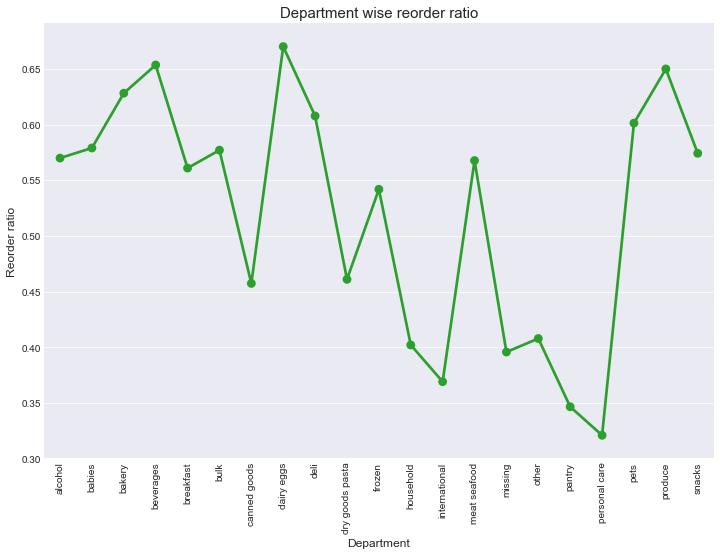

In [91]:
#which departments are being reordered most
grouped_dept = users_flow.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_dept['department'].values, grouped_dept['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# produce and dairy egg are the biggest

In [28]:
product.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [29]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000
3,2254736,1,prior,4,4,7,29.000
4,431534,1,prior,5,4,15,28.000


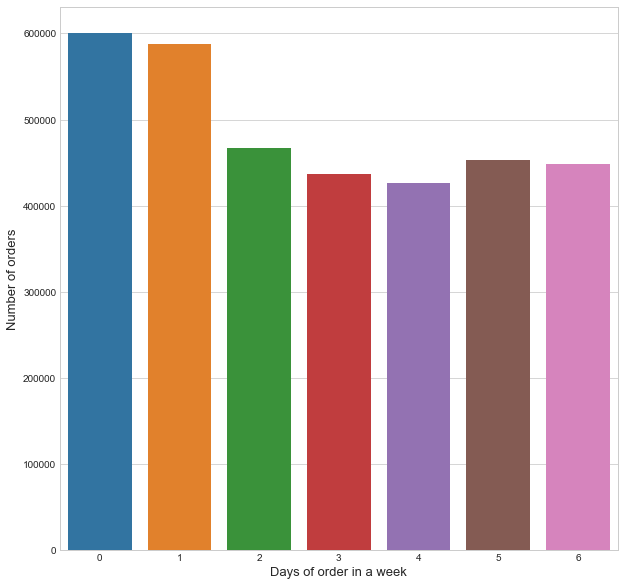

In [30]:
grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

#people order most in the weekend

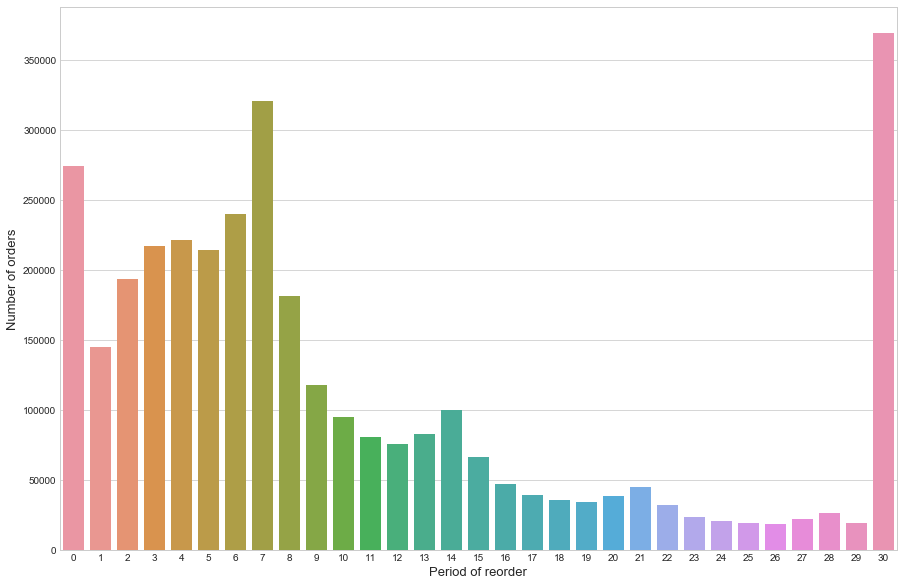

In [31]:
# period of reorders
grouped = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()
#People usually reorder either after 1 week or after 1 month.

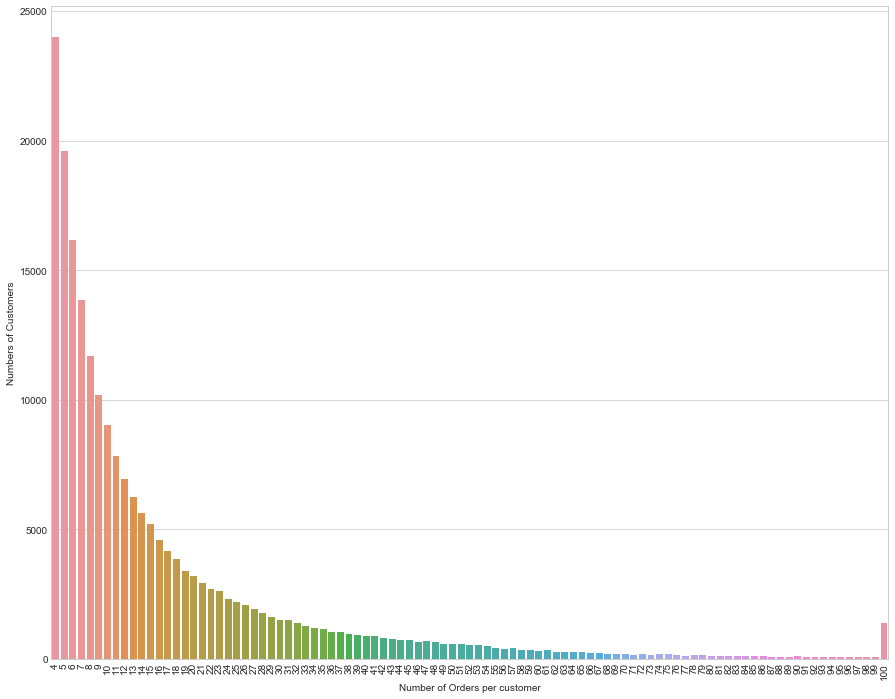

In [36]:
# number of orders made by a customer
grouped = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
grouped = grouped.groupby('order_id').aggregate("count")

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(grouped.index, grouped.user_id)
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Orders per customer')
plt.xticks(rotation='vertical')
plt.show()
#most cust placed ~4 orders

In [37]:
departments = pd.read_csv('/Users/mousumi/instracart/instacart-market-basket-analysis/departments.csv')

In [38]:
aisles = pd.read_csv('/Users/mousumi/instracart/instacart-market-basket-analysis/aisles.csv')

In [40]:
items  = pd.merge(left =pd.merge(left=product, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [41]:

#Most important Departments (by number of products)
grouped = items.groupby("department")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

,department,Total_products,Ratio
17,personal care,6563,0.132
20,snacks,6264,0.126
16,pantry,5371,0.108
3,beverages,4365,0.088
10,frozen,4007,0.081
7,dairy eggs,3449,0.069
11,household,3085,0.062
6,canned goods,2092,0.042
9,dry goods pasta,1858,0.037
19,produce,1684,0.034


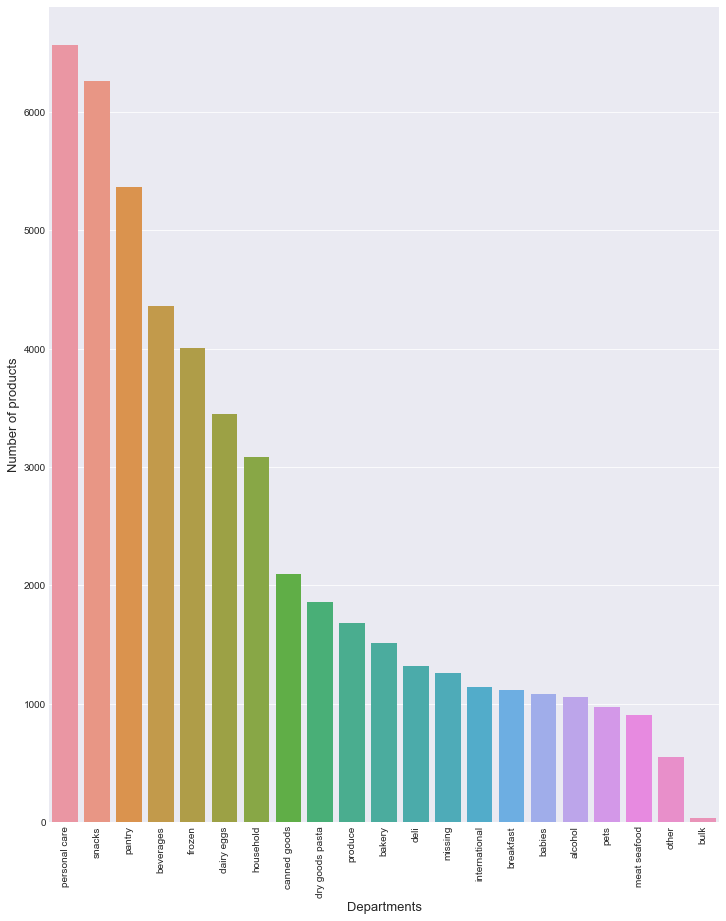

In [42]:
grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

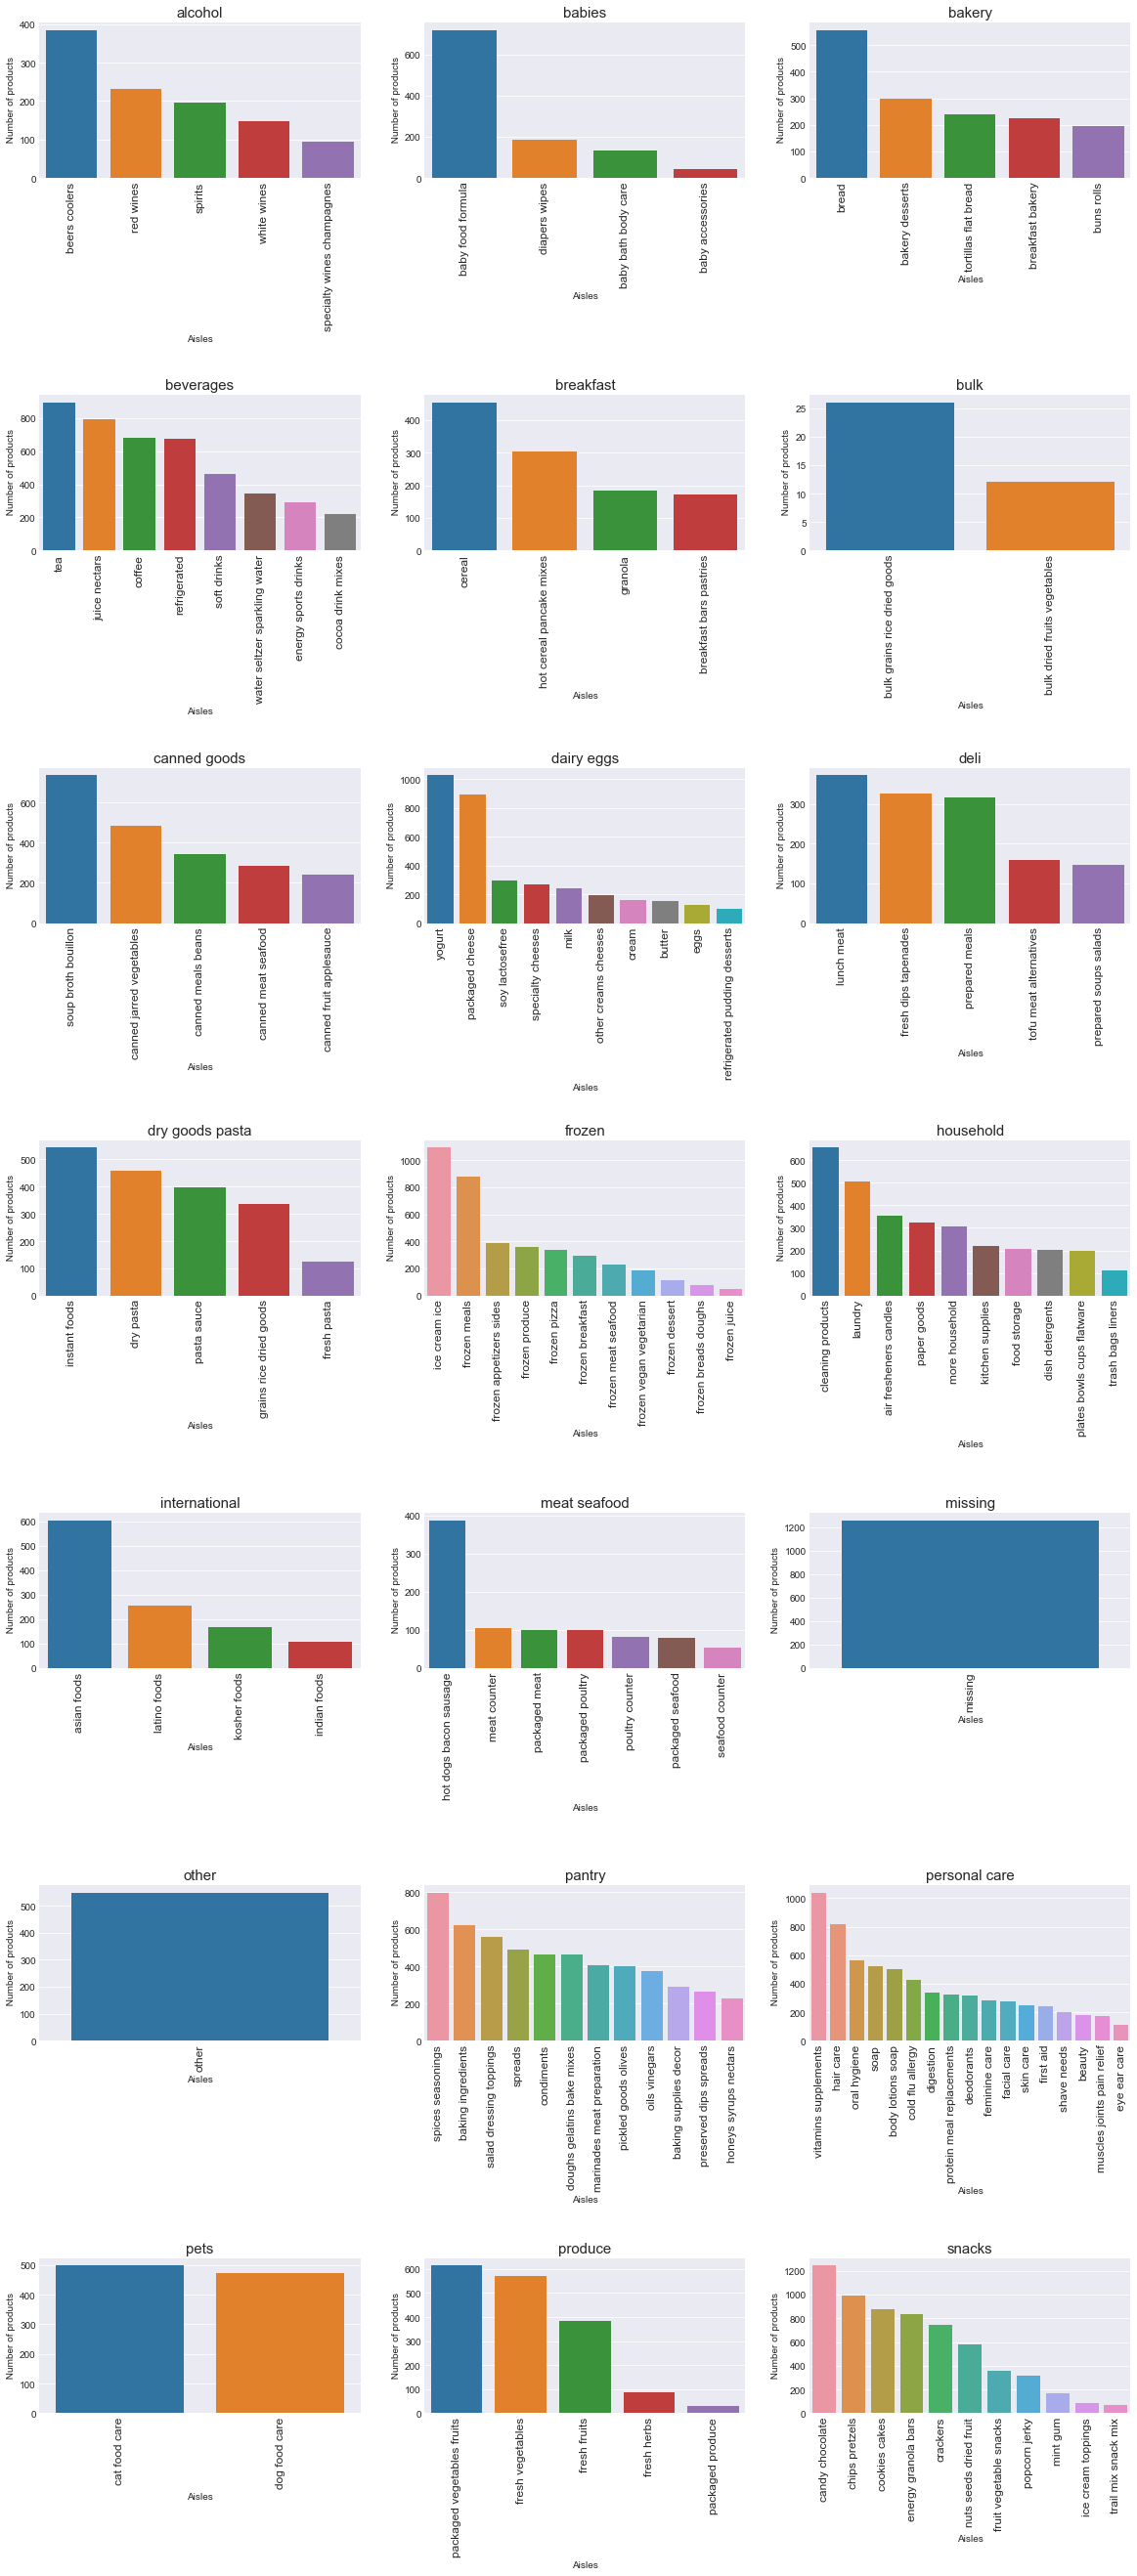

In [43]:
#Most important Aisles in each Department (by number of Products)
grouped = items.groupby(["department", "aisle"])["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)


In [45]:
#Most important Aisles over all Departments (by number of Products)
grouped = items.groupby("aisle")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped = grouped.sort_values(by='Total_products', ascending=False)[:20]
grouped

,aisle,Total_products,Ratio
85,missing,1258,0.025
18,candy chocolate,1246,0.025
71,ice cream ice,1091,0.022
130,vitamins supplements,1038,0.021
133,yogurt,1026,0.021
25,chips pretzels,989,0.020
125,tea,894,0.018
93,packaged cheese,891,0.018
59,frozen meals,880,0.018
31,cookies cakes,874,0.018


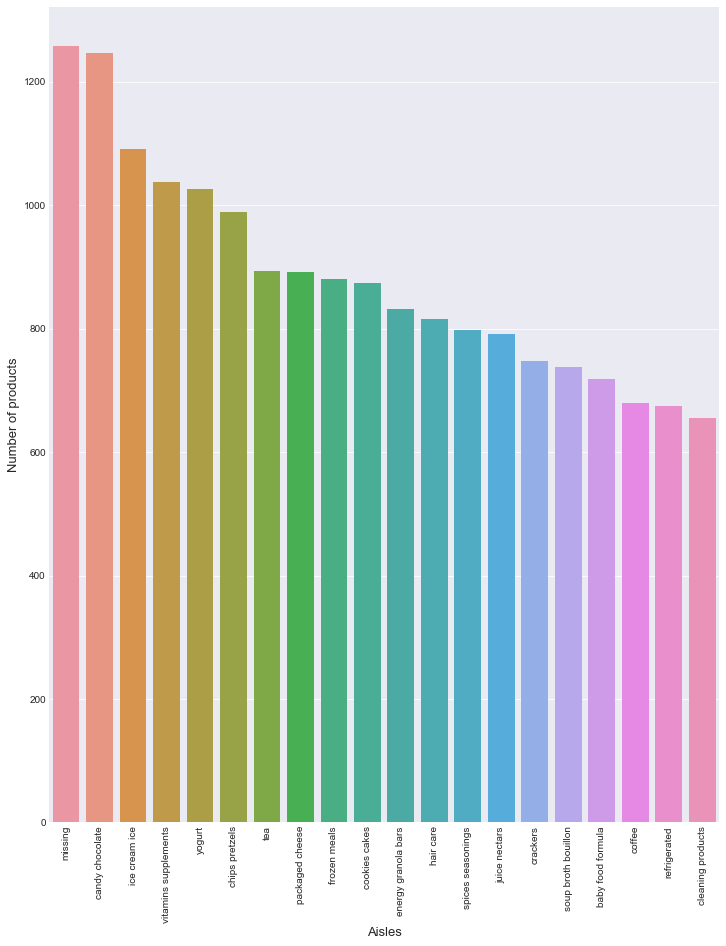

In [46]:
grouped  = grouped.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

In [88]:
#What are customers' favorite Departments and Aisles ?
users_flow = orders[['user_id', 'order_id']].merge(order_product[['order_id', 'product_id', 'reordered']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

users_flow.head()

,user_id,order_id,product_id,reordered,product_name,aisle_id,department_id,department,aisle
0,1,2539329,196,0,Soda,77,7,beverages,soft drinks
1,1,2398795,196,1,Soda,77,7,beverages,soft drinks
2,1,473747,196,1,Soda,77,7,beverages,soft drinks
3,1,2254736,196,1,Soda,77,7,beverages,soft drinks
4,1,431534,196,1,Soda,77,7,beverages,soft drinks


In [63]:
#Best Selling Departments (number of Orders) - produce, dairy eggs and snacks
grouped = users_flow.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped

,department,Total_orders,Ratio
19,produce,9479291,0.292
7,dairy eggs,5414016,0.167
20,snacks,2887550,0.089
3,beverages,2690129,0.083
10,frozen,2236432,0.069
16,pantry,1875577,0.058
2,bakery,1176787,0.036
6,canned goods,1068058,0.033
8,deli,1051249,0.032
9,dry goods pasta,866627,0.027


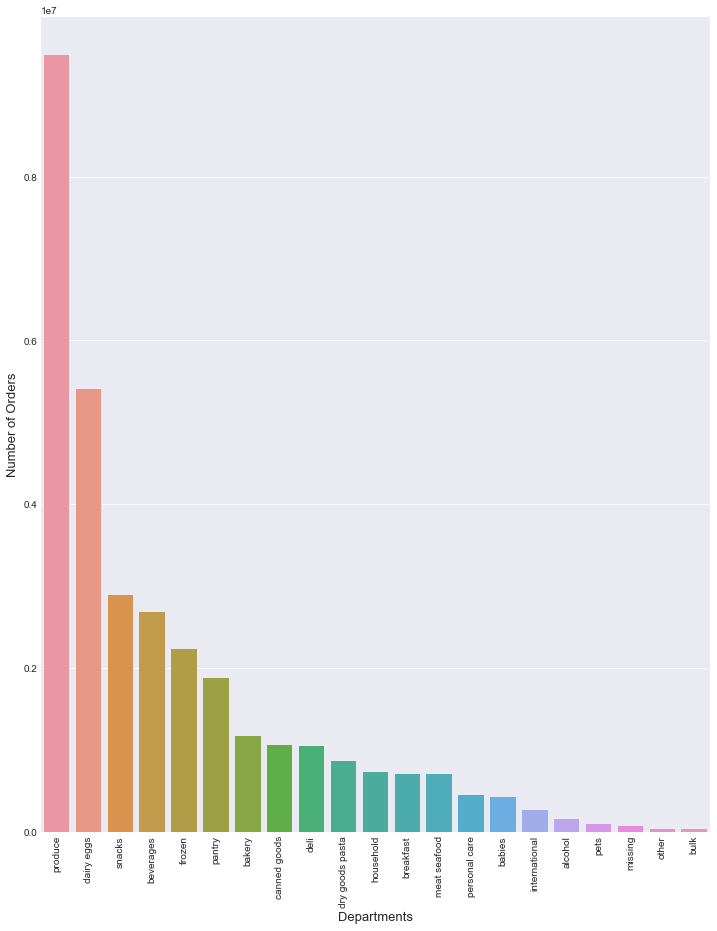

In [64]:
grouped  = grouped.groupby(['department']).sum()['Total_orders'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()


#Best Selling Departments (number of Orders) - produce, dairy eggs and snacks



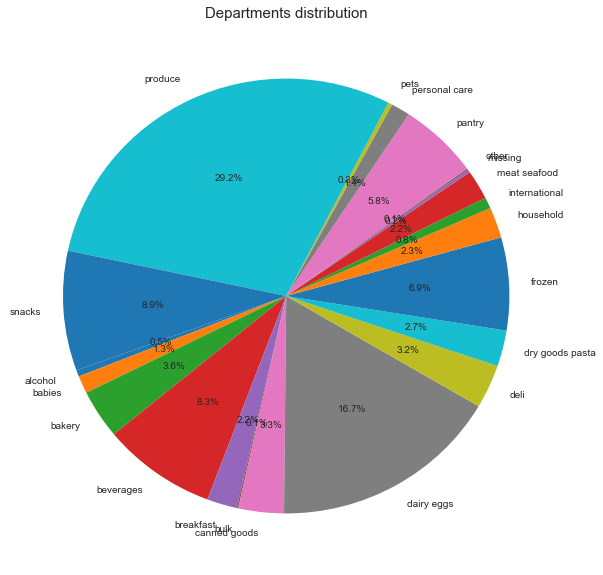

In [73]:
plt.figure(figsize=(10,10))

grouped = users_flow.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
labels = (np.array(grouped.department))
plt.pie(grouped['Ratio'] , labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [52]:
#best selling aisles across all departments
grouped = users_flow.groupby("aisle")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True )
grouped.head(10)

,aisle,Total_orders,Ratio
50,fresh fruits,3642188,0.112
53,fresh vegetables,3418021,0.105
98,packaged vegetables fruits,1765313,0.054
133,yogurt,1452343,0.045
93,packaged cheese,979763,0.030
83,milk,891015,0.027
131,water seltzer sparkling water,841533,0.026
25,chips pretzels,722470,0.022
119,soy lactosefree,638253,0.020
11,bread,584834,0.018


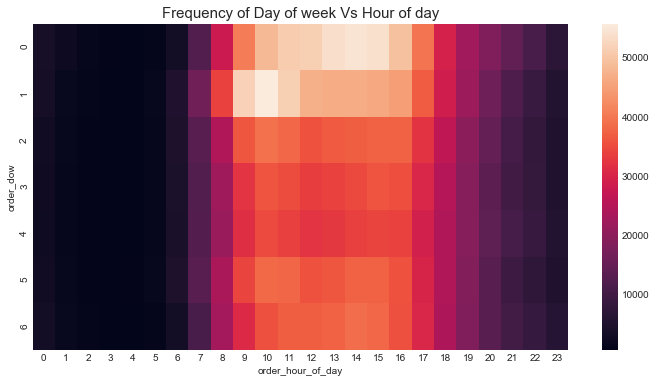

In [53]:
#people usually buy mostly in day time
#Weekend day times are the most order having periods.
grouped_data = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_data = grouped_data.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_data)
plt.title("Frequency of Day of week Vs Hour of day", fontsize=15)
plt.show()

In [92]:
order_product.reordered.sum() / order_product.shape[0]
#probability of a product to be reordered is almost 0.59 i.e. most of the items are being reordered

0.5896974667922161